In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")
df.head()

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8
2,2009,965,Delhi Capitals,69,"Player_17, Player_47, Player_99, Player_40, Pl...",5
3,2014,488,Gujarat Titans,96,"Player_93, Player_60, Player_41, Player_61, Pl...",2
4,2023,439,Kolkata Knight Riders,244,"Player_7, Player_9, Player_25, Player_42, Play...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           250 non-null    int64 
 1   match_id       250 non-null    int64 
 2   team           250 non-null    object
 3   runs_scored    250 non-null    int64 
 4   players        250 non-null    object
 5   wickets_taken  250 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 11.8+ KB


In [4]:
# average runs scored yearly
avg=df.groupby("year")["runs_scored"].mean()

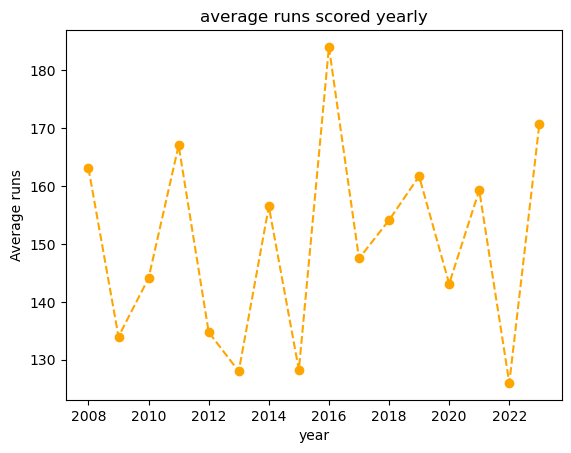

In [5]:
# lineplot
plt.plot(avg.index,avg.values,marker="o",linestyle="--",color="orange")
plt.title("average runs scored yearly")
plt.xlabel("year")
plt.ylabel("Average runs")
plt.show()

In [6]:
avg.values

array([163.1       , 134.        , 144.11111111, 167.04545455,
       134.76923077, 128.        , 156.5       , 128.25      ,
       184.05882353, 147.5       , 154.125     , 161.71428571,
       143.13333333, 159.3       , 126.        , 170.73684211])

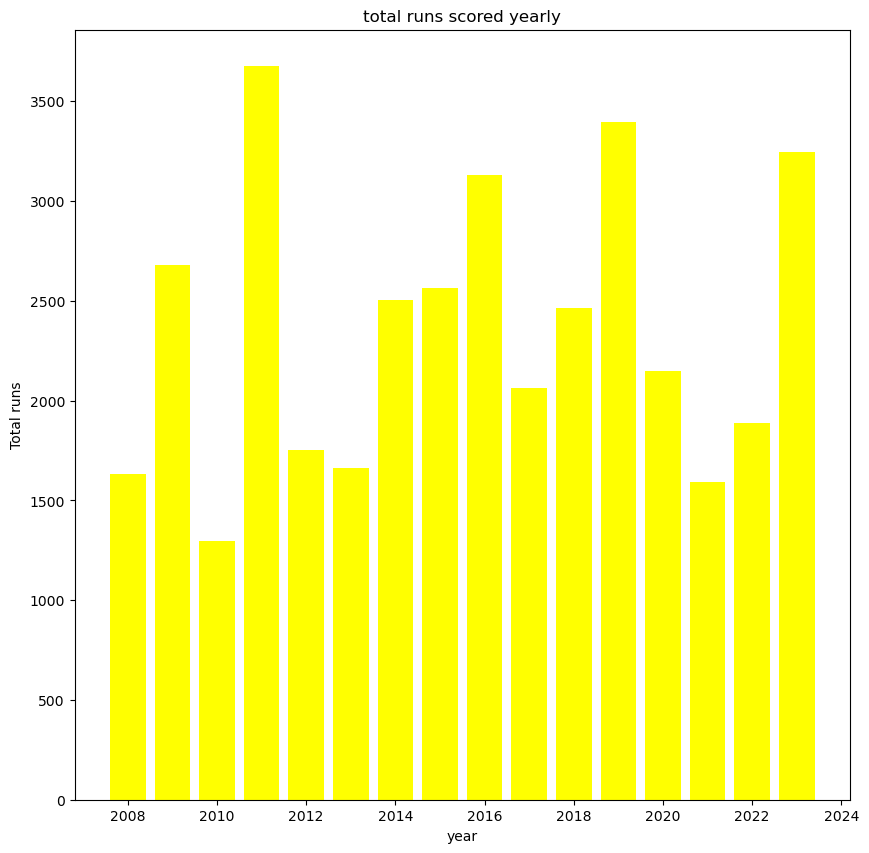

In [7]:
m=df.groupby("year")["runs_scored"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.bar(m.index,m.values,color="yellow")
plt.title("total runs scored yearly")
plt.xlabel("year")
plt.ylabel("Total runs")
plt.show()

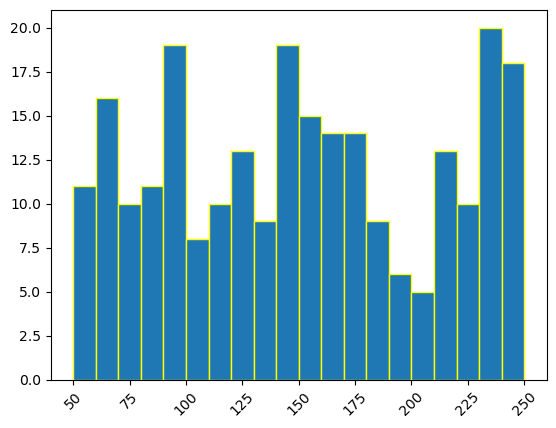

In [8]:
plt.hist(df["runs_scored"],bins=20,edgecolor="yellow")
plt.xticks(rotation=45)
plt.show()

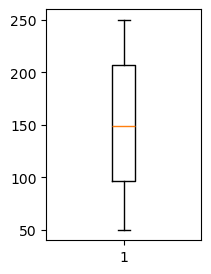

In [9]:
plt.figure(figsize=(2,3))
plt.boxplot(df["runs_scored"])
plt.show()

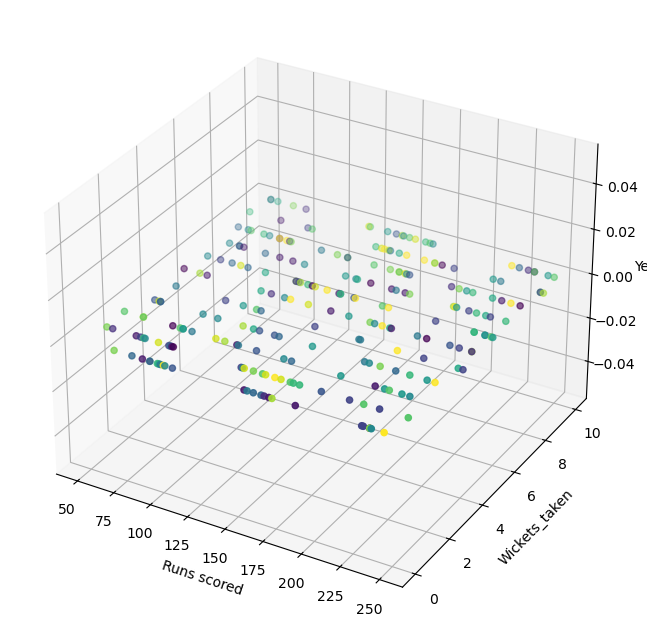

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,8))
figure=fig.add_subplot(projection="3d")
figure.scatter(df["runs_scored"],df["wickets_taken"],c=df["year"])
figure.set_xlabel("Runs scored")
figure.set_ylabel("Wickets_taken")
figure.set_zlabel("Year")
plt.show()

In [11]:
age_groups=["Children (0-18)","Adults (19-25)",
            "Adults (26-34)","Adults (35-54)",
           "Adults (55-64)" ,"Seniors (65+)"]
populations=[75307800,277799100,
            39817700, 81478600,
            42061700,52784400]

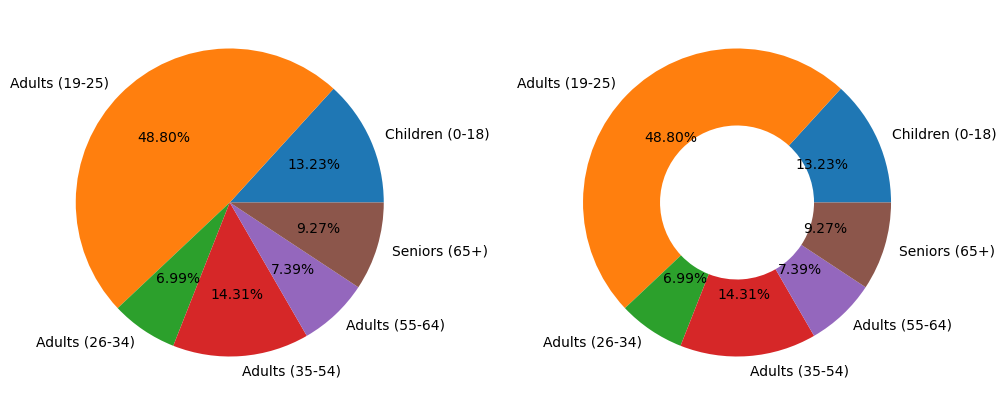

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.pie(populations,labels=age_groups,autopct="%.2f%%")
ax2.pie(populations,labels=age_groups,autopct="%.2f%%",wedgeprops=dict(width=0.5))
plt.show()

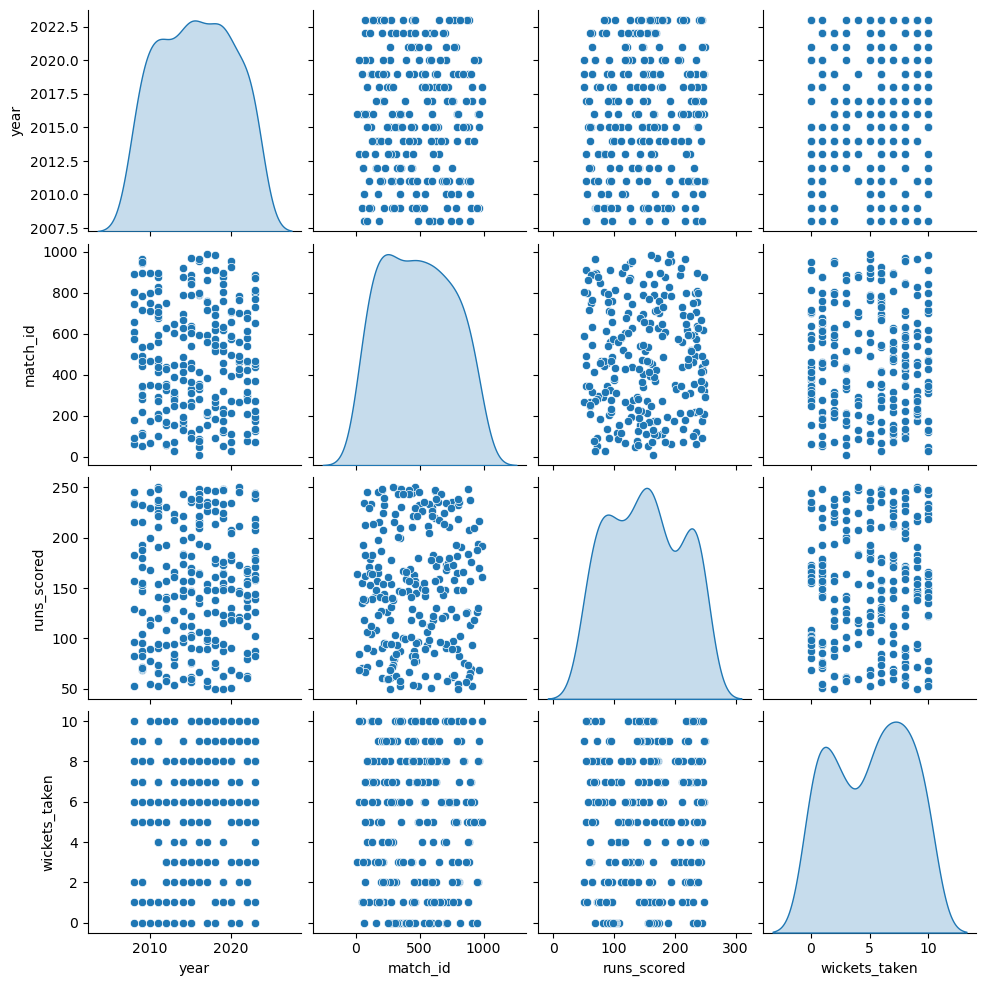

In [17]:
sns.pairplot(df,diag_kind="kde")

In [21]:
c=df.select_dtypes(['int','float'])

<Axes: >

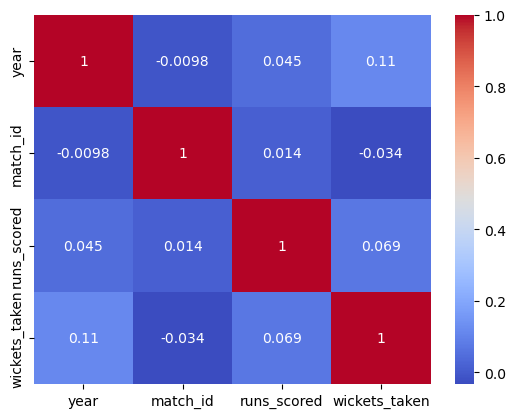

In [29]:
sns.heatmap(c.corr(),annot=True, cmap="coolwarm") # crest

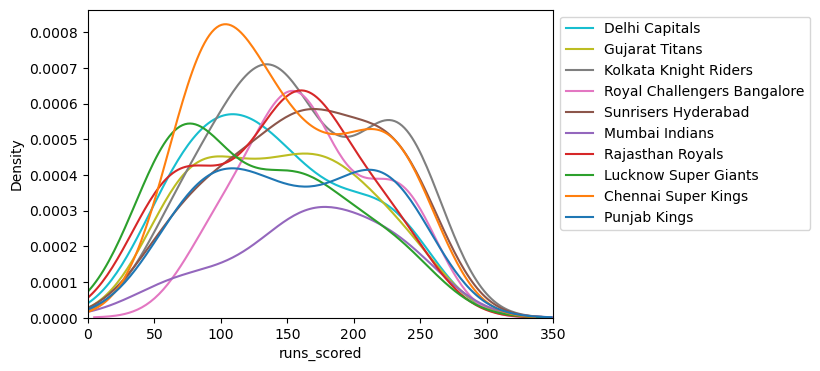

In [74]:
# kdeplot - kernel density estimate
plt.figure(figsize=(6,4)) # width,height
sns.kdeplot(df,x="runs_scored",hue="team")
plt.xlim(0,350)
plt.legend(df["team"].unique(),bbox_to_anchor=(1,1),loc="best")
plt.show()

In [73]:
df["team"].unique()

array(['Delhi Capitals', 'Gujarat Titans', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Chennai Super Kings', 'Punjab Kings'], dtype=object)

<Axes: xlabel='runs_scored', ylabel='Density'>

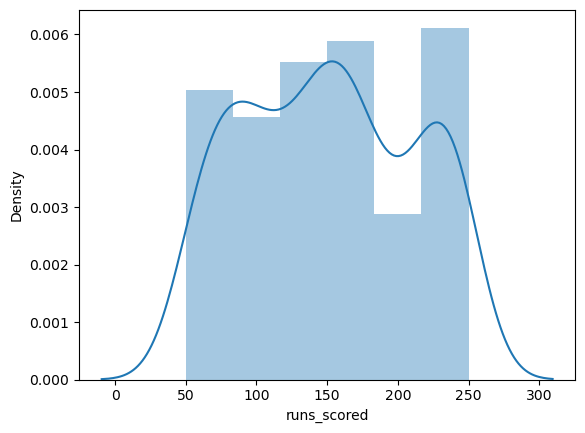

In [54]:
sns.distplot(df["runs_scored"])

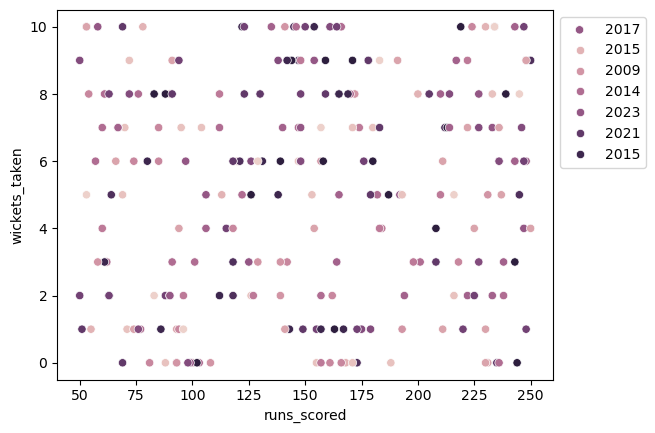

In [59]:
sns.scatterplot(df,x="runs_scored",y="wickets_taken",hue="year")
plt.legend(df["year"],bbox_to_anchor=(1,1),loc="best")

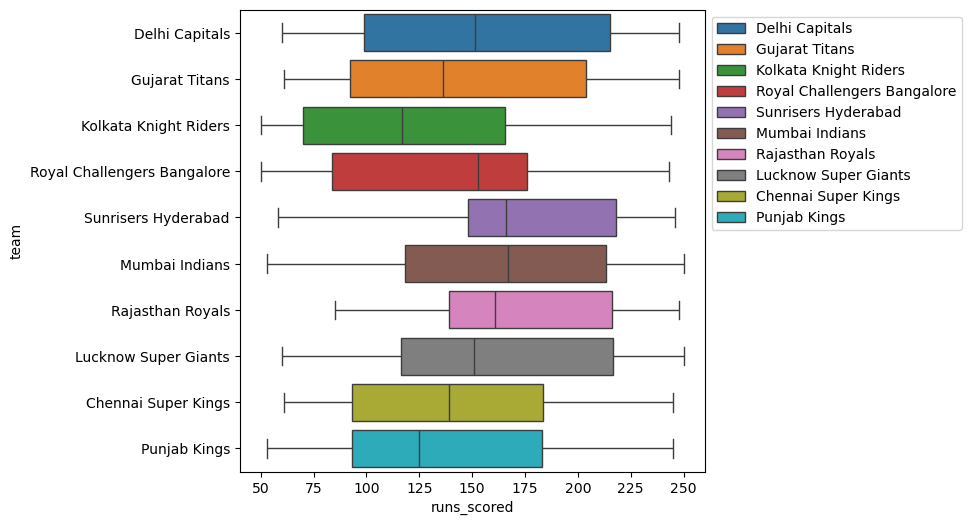

In [75]:
plt.figure(figsize=(6,6))
sns.boxplot(df,x="runs_scored",y="team",hue="team")
plt.legend(df["team"].unique(),bbox_to_anchor=(1,1),loc="best")
plt.show()

<Figure size 600x600 with 0 Axes>

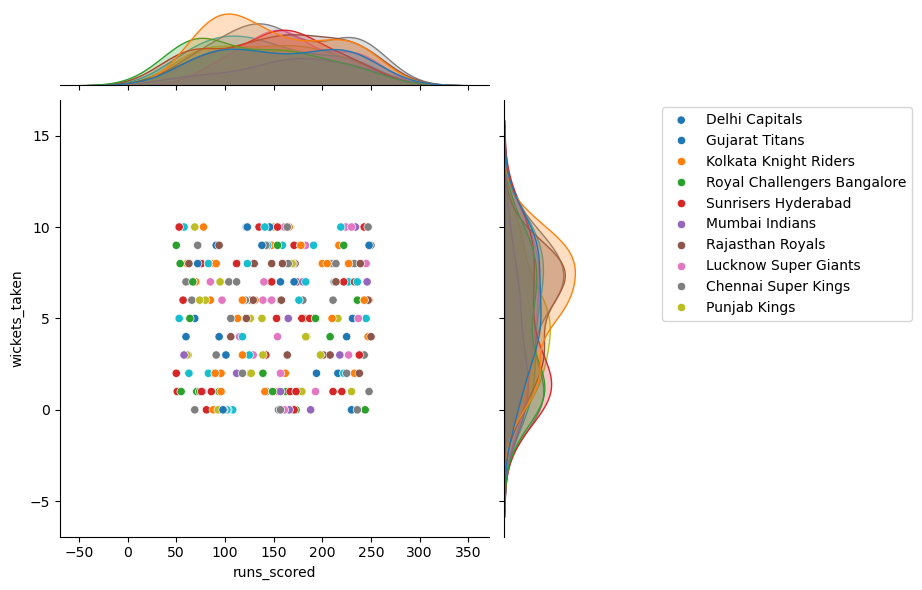

In [82]:
plt.figure(figsize=(6,6))
sns.jointplot(df,x="runs_scored",y="wickets_taken",hue="team")
plt.legend(df["team"].unique(),bbox_to_anchor=(2,1),loc="best")
plt.show()

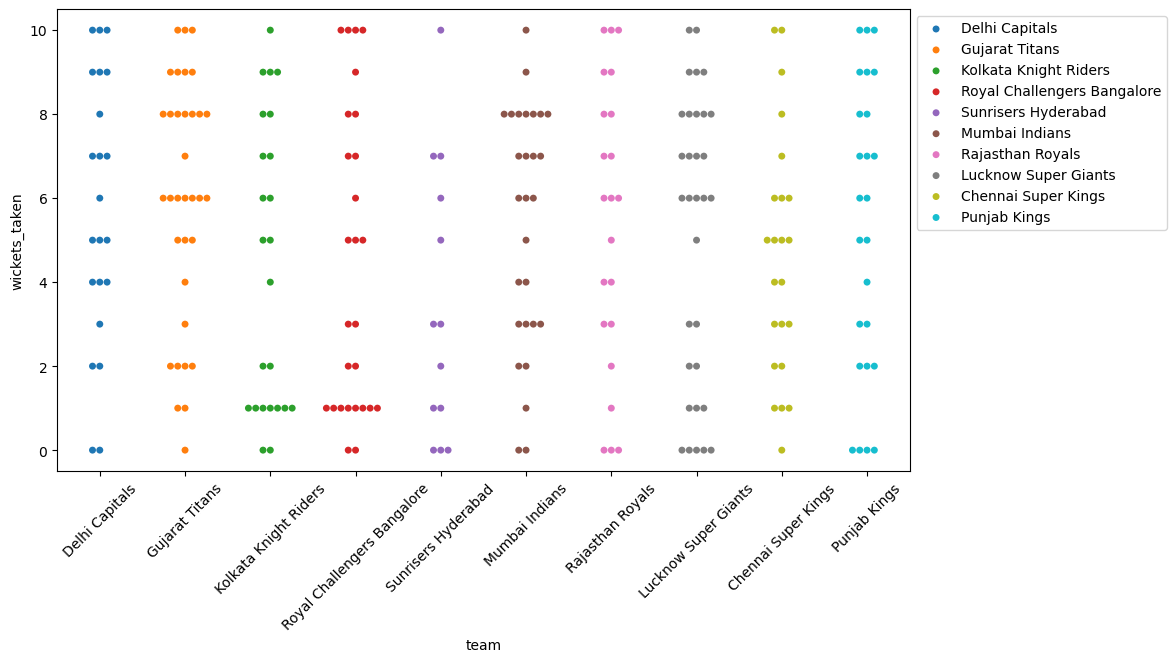

In [96]:
plt.figure(figsize=(11,6))
sns.swarmplot(data=df,x="team",y="wickets_taken",hue="team")
plt.xticks(rotation=45)
plt.legend(df["team"].unique(),bbox_to_anchor=(1,1),loc="best")
plt.show()

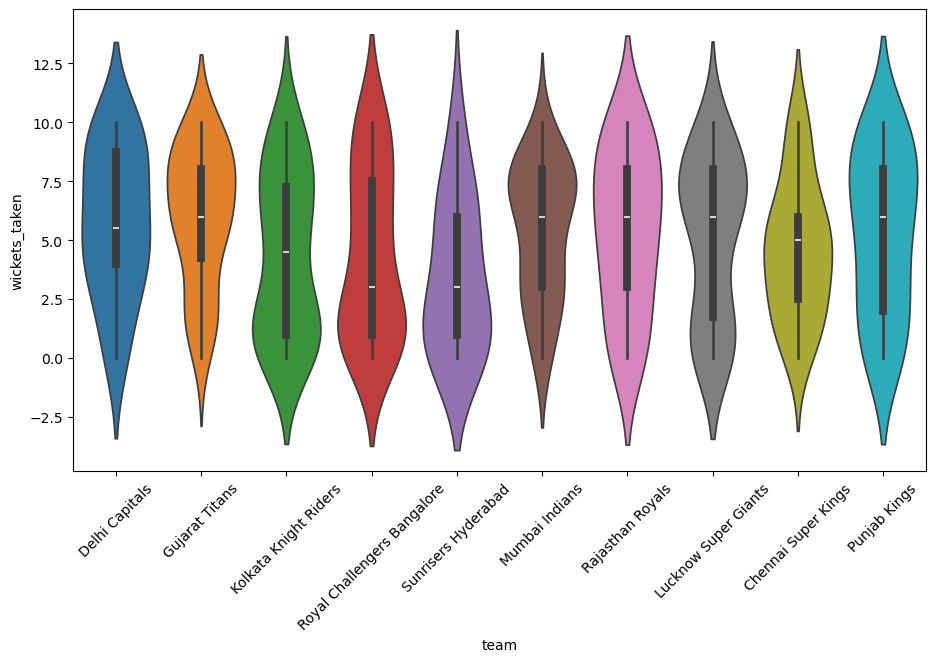

In [99]:
plt.figure(figsize=(11,6))
sns.violinplot(data=df,x="team",y="wickets_taken",hue="team",legend=False)
plt.xticks(rotation=45)
plt.show()

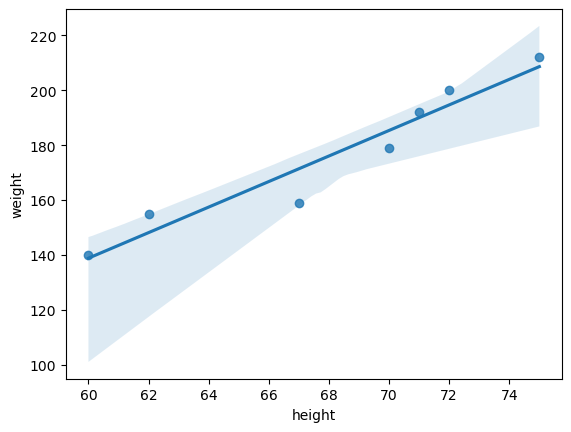

In [4]:
data={
    "weight":[140,155,159,179,192,200,212],
    "height":[60,62,67,70,71,72,75]
}
df=pd.DataFrame(data)
sns.regplot(data=df,x="height",y="weight",ci=99)
plt.show()


In [105]:
df=pd.read_csv("data.csv")

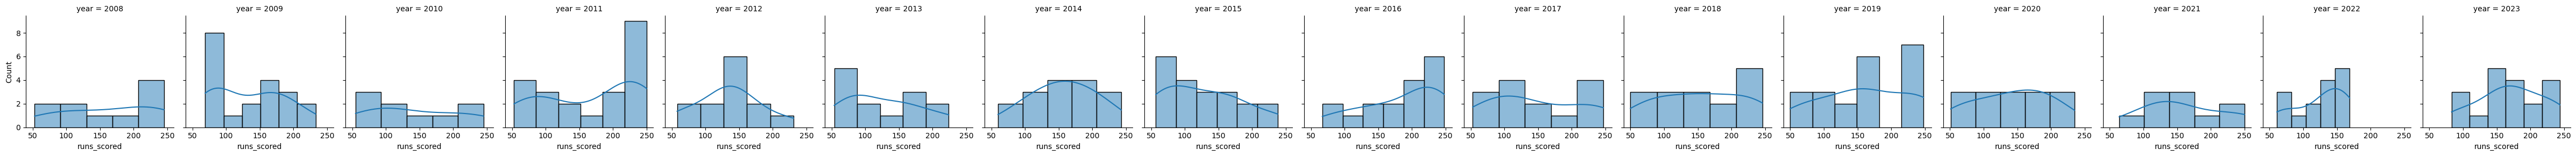

In [108]:
g=sns.FacetGrid(df,col="year")
g.map(sns.histplot,"runs_scored",kde=True)